In [ ]:
# Instalar a biblioteca do cliente do Google e a biblioteca para autenticação
#!pip install --upgrade google-api-python-client google-auth google-auth-httplib2 google-auth-oauthlib

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from google.colab import auth
from google.oauth2 import service_account
from googleapiclient.discovery import build

import pandas as pd
from google.colab import drive

# Passo 1: Montar o Google Drive (necessário em cada novo notebook)
# Uma janela de autenticação aparecerá para você permitir o acesso.
drive.mount('/content/drive')

# Passo 2: Definir o caminho completo do arquivo que você quer carregar
# ATENÇÃO: Use o mesmo caminho que você usou para salvar o arquivo.
caminho_do_arquivo = '/content/drive/MyDrive/MBA/TCC/Materiais_e_Metodos/Dados/dados_com_temas.csv'

# Passo 3: Carregar o arquivo CSV em um DataFrame do Pandas
# Usamos um bloco try...except para dar uma mensagem de erro clara se o arquivo não for encontrado.
try:
    df = pd.read_csv(caminho_do_arquivo)
    print("Arquivo carregado com sucesso!")

    # Opcional: Mostra as 5 primeiras linhas para confirmar que os dados estão corretos
    print("Amostra dos dados carregados:")
    pd.set_option('display.max_columns', None)
    print(df.head())

except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado no caminho especificado.")
    print(f"Verifique se o caminho '{caminho_do_arquivo}' está correto.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivo carregado com sucesso!
Amostra dos dados carregados:
             timestamp  idade_ate_25      idade_26_35 idade_36_45  \
0  29/05/2025 14:25:27           NaN              NaN         NaN   
1  30/05/2025 21:43:56           NaN    Pós-graduação         NaN   
2  31/05/2025 12:03:02           NaN  Ensino Superior         NaN   
3  31/05/2025 17:40:18           NaN  Ensino Superior         NaN   
4  02/06/2025 10:09:19  Ensino Médio              NaN         NaN   

  idade_46_ou_mais        preta        parda  indigena amarela branca  \
0    Pós-graduação          NaN  Mulher(cis)       NaN     NaN    NaN   
1              NaN  Mulher(cis)          NaN       NaN     NaN    NaN   
2              NaN  Mulher(cis)          NaN       NaN     NaN    NaN   
3              NaN          NaN  Mulher(cis)       NaN     NaN    NaN   
4              NaN  Mulher(cis

In [ ]:
# Mostrar o número de respostas e de perguntas
print(f"Total de respostas (participantes): {df_raw.shape[0]}")
print(f"Total de perguntas (colunas): {df_raw.shape[1]}")
print("\n")

Total de respostas (participantes): 41
Total de perguntas (colunas): 30




In [ ]:
# Analisar a frequência das respostas para o perfil demográfico e profissional
# Usando os nomes originais das colunas, como estão no seu arquivo bruto.
print("### Análise de Frequência - Perfil da Amostra ###")
print("-" * 40)

### Análise de Frequência - Perfil da Amostra ###
----------------------------------------


In [ ]:
# 1. Perfil de Gênero e Raça (com base nas colunas da matriz)
print("1. Perfil de Gênero e Raça:\n")
# Filtrando as colunas de forma mais precisa
genero_raca_cols = [
    'Como você se autodeclara em relação à sua raça/cor e com qual gênero você se identifica?\n(Por favor, marque a opção que melhor te representa.) [Preta]',
    'Como você se autodeclara em relação à sua raça/cor e com qual gênero você se identifica?\n(Por favor, marque a opção que melhor te representa.) [Parda]',
    'Como você se autodeclara em relação à sua raça/cor e com qual gênero você se identifica?\n(Por favor, marque a opção que melhor te representa.) [Indígena]',
    'Como você se autodeclara em relação à sua raça/cor e com qual gênero você se identifica?\n(Por favor, marque a opção que melhor te representa.) [Amarela]',
    'Como você se autodeclara em relação à sua raça/cor e com qual gênero você se identifica?\n(Por favor, marque a opção que melhor te representa.) [Branca]'
]

# Função de consolidação para extrair ambos gênero e raça
def consolidate_genero_raca_pair(row):
    for col in genero_raca_cols:
        value = row[col]
        # Verifica se a célula não está vazia e não é um espaço em branco
        if pd.notna(value) and str(value).strip() != '':
            raca = col.split('[')[-1].replace(']','').strip()
            genero = str(value).strip()
            return pd.Series([genero, raca])
    return pd.Series([np.nan, np.nan])

# Aplicar a função para criar as novas colunas
df_raw[['genero', 'raca']] = df_raw.apply(consolidate_genero_raca_pair, axis=1)

# Agora, fazemos a análise de frequência nas novas colunas
print("### Análise de Frequência - Perfil de Gênero e Raça ###")
print("-" * 40)
genero_counts = df_raw['genero'].value_counts()
raca_counts = df_raw['raca'].value_counts()
print("Distribuição de Gênero:")
print(genero_counts.to_string())
print("\n")
print("Distribuição de Raça:")
print(raca_counts.to_string())
print("\n")



1. Perfil de Gênero e Raça:

### Análise de Frequência - Perfil de Gênero e Raça ###
----------------------------------------
Distribuição de Gênero:
genero
Mulher(cis)      40
Não responder     1


Distribuição de Raça:
raca
Preta      21
Parda      12
Branca      6
Amarela     2




**Análises de Frequência**

In [ ]:
# Agora, fazemos a análise de frequência nas novas colunas
print("### Análise de Frequência - Perfil de Gênero e Raça ###")
print("-" * 40)
genero_counts = df['genero'].value_counts()
raca_counts = df['raca'].value_counts()
print("Distribuição de Gênero:")
print(genero_counts.to_string())
print("\n")
print("Distribuição de Raça:")
print(raca_counts.to_string())
print("\n")

print("Distribuição da Raça Agrupada:")
print(df['raca_agrupada'].value_counts().to_string())
print("\n")

# Now, fazemos a análise de frequência nas novas colunas
print("### Análise de Frequência - Perfil de Idade e Escolaridade ###")
print("-" * 40)
idade_counts = df['idade'].value_counts()
escolaridade_counts = df['escolaridade'].value_counts()
print("Distribuição de idade:")
print(idade_counts.to_string())
print("\n")
print("Distribuição de Escolaridade:")
print(escolaridade_counts.to_string())
print("\n")

# Now, fazemos a análise de frequência nas novas colunas
print("### Análise de Frequência - Perfil de Senioridade e Especialidade ###")
print("-" * 40)
senioridade_counts = df['senioridade'].value_counts()
especialidade_counts = df['especialidade'].value_counts()
print("Distribuição de Senioridade:")
print(senioridade_counts.to_string())
print("\n")
print("Distribuição de Especialidade:")
print(especialidade_counts.to_string())
print("\n")


### Análise de Frequência - Perfil de Gênero e Raça ###
----------------------------------------
Distribuição de Gênero:
genero
Mulher(cis)      40
Não responder     1


Distribuição de Raça:
raca
preta      21
parda      12
branca      6
amarela     2


Distribuição da Raça Agrupada:
raca_agrupada
Negra      33
Branca      6
Amarela     2


### Análise de Frequência - Perfil de Idade e Escolaridade ###
----------------------------------------
Distribuição de idade:
idade
idade_26_35         22
idade_ate_25        12
idade_36_45          4
idade_46_ou_mais     3


Distribuição de Escolaridade:
escolaridade
Ensino Superior    18
Pós-graduação      16
Ensino Médio        4
Mestrado            3


### Análise de Frequência - Perfil de Senioridade e Especialidade ###
----------------------------------------
Distribuição de Senioridade:
senioridade
dev_eng_software    13
dados                9
negocios             5
ux_ui                5
po                   4
si                   2
qa    

In [ ]:
# Passo 3: Análise Exploratória e Apresentação dos Resultados
print("### Análise Exploratória dos Dados ###\n")

# 3.1 Gênero e Raça
print("1. Distribuição de Raça/Cor e Gênero:")
genero_perc = df['genero'].value_counts(normalize=True).mul(100).round(1)
raca_perc = df['raca'].value_counts(normalize=True).mul(100).round(1)
print(genero_perc.to_string())
print(raca_perc.to_string())
print("\n")

### Análise Exploratória dos Dados ###

1. Distribuição de Raça/Cor e Gênero:
genero
Mulher(cis)      97.6
Não responder     2.4
raca
preta      51.2
parda      29.3
branca     14.6
amarela     4.9




In [ ]:
# 3.2 Idade e Escolaridade
print("2. Distribuição de Idade e Nível de Escolaridade:")
idade_perc = df['idade'].value_counts(normalize=True).mul(100).round(1)
escolaridade_perc = df['escolaridade'].value_counts(normalize=True).mul(100).round(1)
print(idade_perc.to_string())
print(escolaridade_perc.to_string())
print("\n")

2. Distribuição de Idade e Nível de Escolaridade:
idade
idade_26_35         53.7
idade_ate_25        29.3
idade_36_45          9.8
idade_46_ou_mais     7.3
escolaridade
Ensino Superior    43.9
Pós-graduação      39.0
Ensino Médio        9.8
Mestrado            7.3




In [ ]:
# 3.3 Tempo de Experiência
print("3. Distribuição de Tempo de Experiência em Tecnologia:")
tempo_experiencia_perc = df['tempo_experiencia'].value_counts(normalize=True).mul(100).round(1)
print(tempo_experiencia_perc.to_string())
print("\n")

3. Distribuição de Tempo de Experiência em Tecnologia:
tempo_experiencia
1 a 3 anos         43.9
4 a 6 anos         22.0
Menos de 1 ano     22.0
Mais de 10 anos     7.3
7 a 10 anos         4.9




In [ ]:
# 3.4 Cargo Atual
print("4. Distribuição de Cargo Atual:")
especialidade_perc = df['especialidade'].value_counts(normalize=True).mul(100).round(1)
senioridade_perc = df['senioridade'].value_counts(normalize=True).mul(100).round(1)
print(especialidade_perc.to_string())
print(senioridade_perc.to_string())
print("\n")

4. Distribuição de Cargo Atual:
especialidade
Júnior           41.5
Pleno            22.0
Especialista     14.6
Estag/Trainee     9.8
Sênior            7.3
Líder             4.9
senioridade
dev_eng_software    31.7
dados               22.0
negocios            12.2
ux_ui               12.2
po                   9.8
si                   4.9
qa                   2.4
infraestrutura       2.4
devops               2.4




In [ ]:
# 3.5 Tempo de Experiência
print("5. Distribuição de Tempo de Experiência em Tecnologia:")
if 'tempo_experiencia' in df.columns:
    tempo_experiencia_counts = df['tempo_experiencia'].value_counts(normalize=True).mul(100).round(1)
    print(tempo_experiencia_counts.to_string())
else:
    print("Column 'tempo_experiencia' not found in DataFrame.")
print("\n")


5. Distribuição de Tempo de Experiência em Tecnologia:
tempo_experiencia
1 a 3 anos         43.9
4 a 6 anos         22.0
Menos de 1 ano     22.0
Mais de 10 anos     7.3
7 a 10 anos         4.9




In [ ]:
# Passo 4: Análise de Respostas Múltiplas
# A forma de análise é diferente. Vamos contar a frequência de cada opção.
print("6. Enfrentou Barreiras (Respostas Múltiplas):")
barreiras_split = df['enfrentou_barreiras'].str.split(',').explode().str.strip()
barreiras_counts = desafios_split.value_counts(normalize=True).mul(100).round(1)
print(barreiras_counts.to_string())
print("\n")

6. Enfrentou Barreiras (Respostas Múltiplas):
enfrentou_barreiras
Concordo               39.0
Concordo Totalmente    22.0
Neutro                 22.0
Discordo               14.6
Discordo Totalmente     2.4




In [ ]:
# Passo 4: Análise de Respostas Múltiplas
print("7. oportunidades_desenvolvimento (Respostas Múltiplas):")
oportunidades_desenvolvimento_split = df['oportunidades_desenvolvimento'].str.split(',').explode().str.strip()
oportunidades_desenvolvimento_counts = oportunidades_desenvolvimento_split.value_counts(normalize=True).mul(100).round(1)
print(oportunidades_desenvolvimento_counts.to_string())
print("\n")

7. oportunidades_desenvolvimento (Respostas Múltiplas):
oportunidades_desenvolvimento
Concordo Totalmente    39.0
Concordo               31.7
Discordo               14.6
Neutro                 14.6




In [ ]:
# Passo 4: Análise de Respostas Múltiplas
print("8. fatores_permanencia (Respostas Múltiplas):")
fatores_permanencia_split = df['fatores_permanencia'].str.split(',').explode().str.strip()
fatores_permanencia_counts = fatores_permanencia_split.value_counts(normalize=True).mul(100).round(1)
print(fatores_permanencia_counts.to_string())
print("\n")

8. fatores_permanencia (Respostas Múltiplas):
fatores_permanencia
Flexibilidade de horários e/ou modelo de trabalho (híbrido/remoto)          19.7
Remuneração e pacote de benefícios competitivos                             13.7
Promoção e progressão salarial justas                                       11.1
Salário competitivo                                                          9.4
Cultura organizacional que valoriza a diversidade                            9.4
Ambiente genuinamente inclusivo e respeitoso                                 8.5
Desafios técnicos e projetos estimulantes                                    7.7
Reconhecimento profissional                                                  6.8
Representatividade em cargos de liderança                                    5.1
Oportunidade de gerar impacto positivo                                       3.4
Programas de mentoria e desenvolvimento específicos para mulheres negras     3.4
Liberdade                                  

In [ ]:
# Passo 4: Análise de Respostas Múltiplas
print("9. sentimento_valorizacao (Respostas Múltiplas):")
sentimento_valorizacao_split = df['sentimento_valorizacao'].str.split(',').explode().str.strip()
sentimento_valorizacao_counts = sentimento_valorizacao_split.value_counts(normalize=True).mul(100).round(1)
print(sentimento_valorizacao_counts.to_string())
print("\n")

9. sentimento_valorizacao (Respostas Múltiplas):
sentimento_valorizacao
Concordo               46.3
Concordo Totalmente    43.9
Neutro                  9.8




In [ ]:
# Passo 4: Análise de Respostas Múltiplas
print("10. impacto_vaga_afirmativa (Respostas Múltiplas):")
impacto_vaga_afirmativa_split = df['impacto_vaga_afirmativa'].str.split(',').explode().str.strip()
impacto_vaga_afirmativa_counts = impacto_vaga_afirmativa_split.value_counts(normalize=True).mul(100).round(1)
print(impacto_vaga_afirmativa_counts.to_string())
print("\n")

10. impacto_vaga_afirmativa (Respostas Múltiplas):
impacto_vaga_afirmativa
Concordo Totalmente    66.7
Concordo               22.2
Neutro                 11.1




In [ ]:
# 3.3 Tempo de Experiência
print("11. Distribuição de criterios_vaga_afirmativa:")
if 'criterios_vaga_afirmativa' in df.columns:
    criterios_vaga_afirmativa_counts = df['criterios_vaga_afirmativa'].value_counts(normalize=True).mul(100).round(1)
    print(criterios_vaga_afirmativa_counts.to_string())
else:
    print("Column 'criterios_vaga_afirmativa' not found in DataFrame.")
print("\n")


11. Distribuição de criterios_vaga_afirmativa:
criterios_vaga_afirmativa
Não ingressei por vaga afirmativa                                                                                                                                                                                    31.7
Raça (direcionada a pessoas negras), Gênero (direcionada a mulheres)                                                                                                                                                 12.2
Raça (direcionada a pessoas negras)                                                                                                                                                                                   9.8
Gênero (direcionada a mulheres), Baixa renda                                                                                                                                                                          7.3
Não tenho clareza sobre o critério específico da vaga  

In [ ]:
# Passo 4: Análise de Respostas Múltiplas
print("9. fatores_permanencia (Respostas Múltiplas):")
fatores_permanencia_split = df['fatores_permanencia'].str.split(',').explode().str.strip()
fatores_permanencia_counts = fatores_permanencia_split.value_counts(normalize=True).mul(100).round(1)
print(fatores_permanencia_counts.to_string())
print("\n")

9. fatores_permanencia (Respostas Múltiplas):
fatores_permanencia
Flexibilidade de horários e/ou modelo de trabalho (híbrido/remoto)          19.7
Remuneração e pacote de benefícios competitivos                             13.7
Promoção e progressão salarial justas                                       11.1
Salário competitivo                                                          9.4
Cultura organizacional que valoriza a diversidade                            9.4
Ambiente genuinamente inclusivo e respeitoso                                 8.5
Desafios técnicos e projetos estimulantes                                    7.7
Reconhecimento profissional                                                  6.8
Representatividade em cargos de liderança                                    5.1
Oportunidade de gerar impacto positivo                                       3.4
Programas de mentoria e desenvolvimento específicos para mulheres negras     3.4
Liberdade                                  

In [ ]:
# 3.3 'fatores_permanencia'
print("3. Distribuição de 'estado' :")
if 'estado' in df.columns:
    fatores_permanencia_counts = df['estado'].value_counts(normalize=True).mul(100).round(1)
    print(fatores_permanencia_counts.to_string())
else:
    print("Column 'estado' not found in DataFrame.")
print("\n")


3. Distribuição de 'estado' :
estado
São Paulo            43.9
Paraná               12.2
Pernambuco            9.8
Bahia                 9.8
Minas Gerais          7.3
Rio de Janeiro        4.9
Ceará                 2.4
Espírito Santo        2.4
Rio Grande do Sul     2.4
Sergipe               2.4
Distrito Federal      2.4




In [ ]:
# Análise da pergunta de múltipla escolha: Fatores de Permanência
print("8. Fatores que mais motivam a permanência na área de tecnologia:")

# O método .str.split(',').explode() transforma cada fator selecionado em uma linha separada
fatores_permanencia_split = df['fatores_permanencia'].str.split(',').explode().str.strip()

# Calculamos a frequência de cada fator
fatores_permanencia_counts = fatores_permanencia_split.value_counts(normalize=True).mul(100).round(1)

print(fatores_permanencia_counts.to_string())
print("\n")

8. Fatores que mais motivam a permanência na área de tecnologia:
fatores_permanencia
Flexibilidade de horários e/ou modelo de trabalho (híbrido/remoto)          19.7
Remuneração e pacote de benefícios competitivos                             13.7
Promoção e progressão salarial justas                                       11.1
Salário competitivo                                                          9.4
Cultura organizacional que valoriza a diversidade                            9.4
Ambiente genuinamente inclusivo e respeitoso                                 8.5
Desafios técnicos e projetos estimulantes                                    7.7
Reconhecimento profissional                                                  6.8
Representatividade em cargos de liderança                                    5.1
Oportunidade de gerar impacto positivo                                       3.4
Programas de mentoria e desenvolvimento específicos para mulheres negras     3.4
Liberdade               

In [ ]:
# 3.3 Opinião sobre Vagas Afirmativas

print("3. Opinião referente as Vagas Afirmativas:")
if 'opiniao_vagas_afirmativas' in df.columns:
    # 1. Padroniza todos os tipos de "respostas vazias" (strings vazias ou com espaços) para NaN
    opinioes_limpas = df['opiniao_vagas_afirmativas'].replace(r'^\s*$', np.nan, regex=True)
    opiniao_vagas_afirmativas_counts = df['opiniao_vagas_afirmativas'].value_counts(normalize=True).mul(100).round(1)

    # 2. Remove todas as linhas que são NaN
    opinioes_validas = opinioes_limpas.dropna()

    # 3. Verifica se ainda restam respostas após a limpeza
    if not opinioes_validas.empty:
        # Imprime a lista de respostas válidas, sem o número do índice
        print(opinioes_validas.to_string(index=False))
        #print(opiniao_vagas_afirmativas_counts.to_string())
        #print(df['opiniao_vagas_afirmativas'].to_string())
    else:
        print("Nenhuma resposta preenchida foi encontrada para esta pergunta.")

else:
    print("A coluna 'opiniao_vagas_afirmativas' não foi encontrada no DataFrame.")

print("\n")

3. Opinião referente as Vagas Afirmativas:
Essenciais para melhorar a diversidade no traba...
As vagas afirmativas são de extrema importância...
De extrema importância, desde que as vagas não ...
As vagas afirmativas têm um papel de 'porta de ...
Acredito que as vagas afirmativas ajudam a dar ...
Dado o contexto social que vivemos no Brasil e ...
Vejo pontos positivos e negativos no sentido de...
A área de tecnologia não é um ambiente inclusiv...
Entrei no GB graças a um programa que ajudava p...
Na minha visão, as vagas afirmativas são fundam...
acredito que são essenciais , mas não basta só ...
Muito importante desde que sejam realizadas com...
Acredito que elas devem existir pois há uma con...
Acho muito importante ter vagas afirmativas, ma...
Acho super importante. Num país com tamanha des...
São essenciais se a empresa tenta ativamente bu...
É importante para ter oportunidades para grupos...




## **Análise Bivariada (Cruzamento de Variáveis) e Geração de Gráficos**
Com os dados mais bem estruturados, podemos começar a responder perguntas mais complexas, cruzando variáveis para identificar padrões. Para cada cruzamento, usaremos a função pd.crosstab() para gerar a tabela de contingência e, em seguida, um gráfico de barras para visualizar a relação.

**Pergunta 1:** A senioridade varia entre mulheres negras e não negras?

Tabela Cruzada: Senioridade por Raça Agrupada (%)
especialidade  Especialista  Estag/Trainee  Júnior  Líder  Pleno  Sênior
raca_agrupada                                                           
Amarela                 0.0            0.0   100.0    0.0    0.0     0.0
Branca                 33.3            0.0    33.3    0.0   33.3     0.0
Negra                  12.1           12.1    39.4    6.1   21.2     9.1


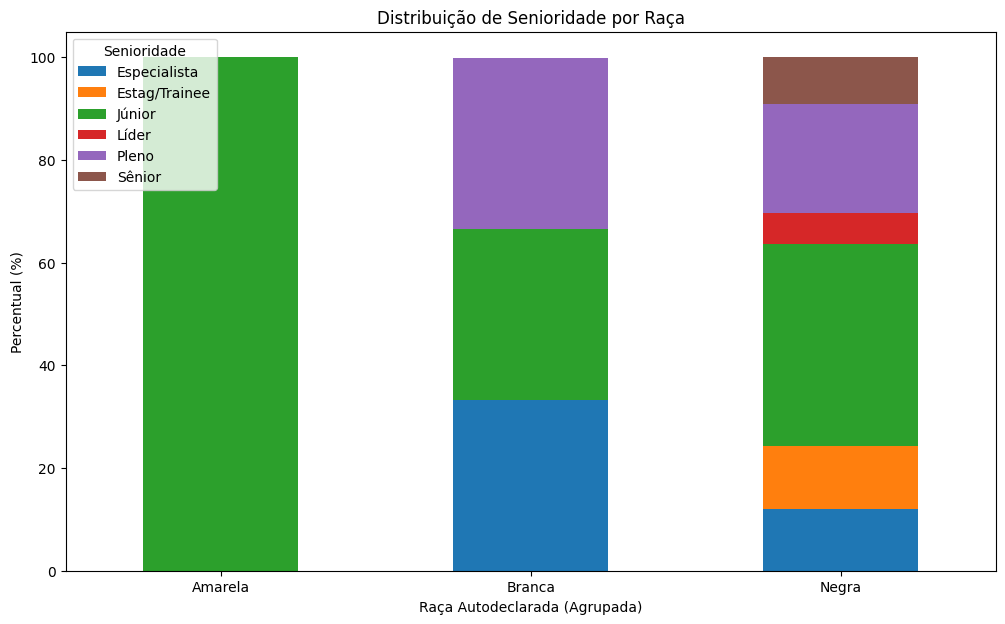

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tabela de cruzamento
senioridade_raca = pd.crosstab(index=df['raca_agrupada'], columns=df['especialidade'], normalize='index').mul(100).round(1)

print("Tabela Cruzada: Senioridade por Raça Agrupada (%)")
print(senioridade_raca)

# Gráfico
senioridade_raca.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribuição de Senioridade por Raça')
plt.ylabel('Percentual (%)')
plt.xlabel('Raça Autodeclarada (Agrupada)')
plt.xticks(rotation=0)
plt.legend(title='Senioridade')
plt.show()

**Pergunta 2:** A percepção sobre o impacto positivo das vagas afirmativas muda de acordo com o tempo de experiência?

Tabela Cruzada: Impacto da Vaga Afirmativa por Tempo de Experiência
impacto_vaga_afirmativa  Neutro  Concordo  Concordo Totalmente
tempo_experiencia                                             
1 a 3 anos                    0         1                   10
4 a 6 anos                    1         2                    3
7 a 10 anos                   1         1                    0
Mais de 10 anos               0         0                    1
Menos de 1 ano                1         2                    4


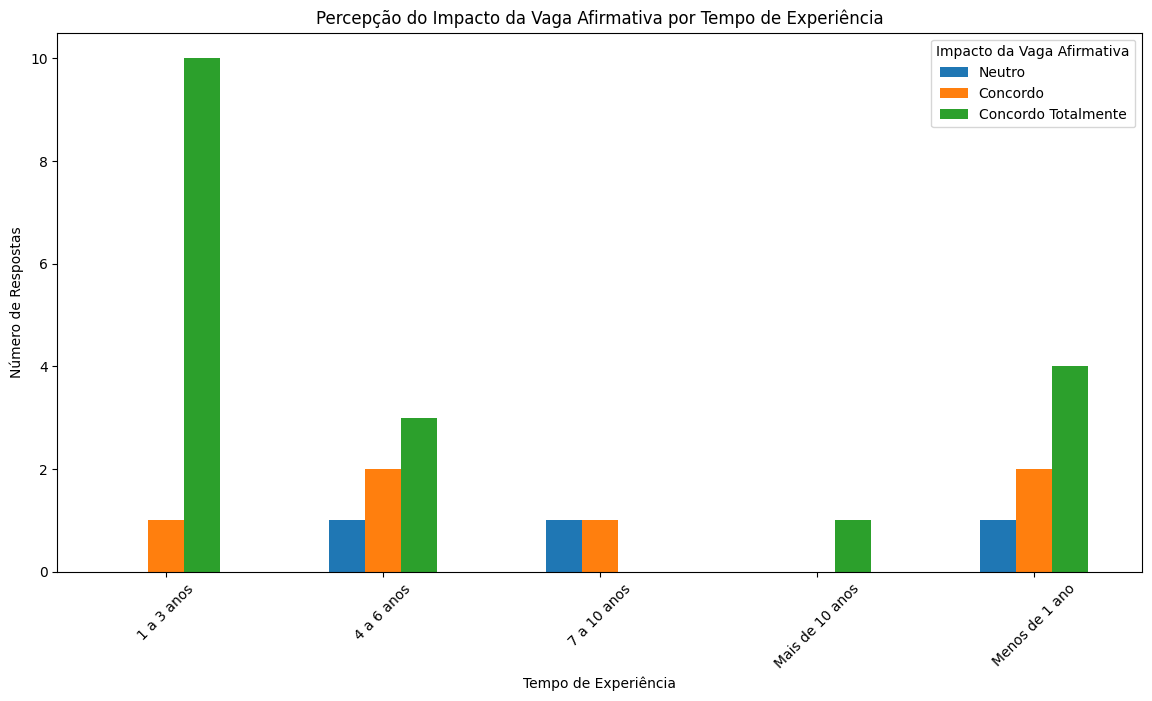

In [ ]:
# Tabela de cruzamento
impacto_experiencia = pd.crosstab(index=df['tempo_experiencia'], columns=df['impacto_vaga_afirmativa'])

print("Tabela Cruzada: Impacto da Vaga Afirmativa por Tempo de Experiência")
print(impacto_experiencia)

# Gráfico
impacto_experiencia.plot(kind='bar', figsize=(14, 7))
plt.title('Percepção do Impacto da Vaga Afirmativa por Tempo de Experiência')
plt.ylabel('Número de Respostas')
plt.xlabel('Tempo de Experiência')
plt.xticks(rotation=45)
plt.legend(title='Impacto da Vaga Afirmativa')
plt.show()

In [ ]:
# 1. Crie um dicionário para mapear os nomes das colunas aos títulos desejados
colunas_e_titulos = {
    'sentimento_enfrentou_barreiras': 'Desafios na Carreira',
    'sentimento_impacto_vaga_afirmativa': 'Impacto Percebido da Vaga Afirmativa',
    'sentimento_valorizacao': 'Sentimento de Valorização Profissional',
    'sentimento_oportunidades_desenvolvimento': 'Percepção sobre Oportunidades de Desenvolvimento',
    'sentimento_opiniao_vagas_afirmativas': 'Opinião Geral sobre Vagas Afirmativas',
    'sentimento_fatores_permanencia': 'Fatores Relevantes para a Permanência'
}

print("\n--- Análise da Distribuição de Sentimentos ---\n")

# 2. Faça um loop 'for' que itera sobre os itens do dicionário
for coluna, titulo in colunas_e_titulos.items():
    print(f"Distribuição de sentimentos sobre: '{titulo}'")

    # Calcula e exibe a distribuição percentual para a coluna atual
    distribuicao = df[coluna].value_counts(normalize=True).mul(100).round(1)
    print(distribuicao)
    print("-" * 50) # Adiciona uma linha para separar as análises



--- Análise da Distribuição de Sentimentos ---

Distribuição de sentimentos sobre: 'Desafios na Carreira'
sentimento_enfrentou_barreiras
positive    100.0
Name: proportion, dtype: float64
--------------------------------------------------
Distribuição de sentimentos sobre: 'Impacto Percebido da Vaga Afirmativa'
sentimento_impacto_vaga_afirmativa
positive    100.0
Name: proportion, dtype: float64
--------------------------------------------------
Distribuição de sentimentos sobre: 'Sentimento de Valorização Profissional'
sentimento_valorizacao
Concordo               46.3
Concordo Totalmente    43.9
Neutro                  9.8
Discordo Totalmente     0.0
Discordo                0.0
Name: proportion, dtype: float64
--------------------------------------------------
Distribuição de sentimentos sobre: 'Percepção sobre Oportunidades de Desenvolvimento'
sentimento_oportunidades_desenvolvimento
positive    100.0
Name: proportion, dtype: float64
------------------------------------------------

In [ ]:
# Análise de sentimento cruzada. Escolha de variáveis para cruzar
# Variável de Perfil (independente): 'senioridade'
# Variável de Sentimento (dependente): 'sentimento_opiniao_vagas_afirmativas'


data = {
    'senioridade': np.random.choice(['Júnior', 'Pleno', 'Sênior'], 100),
    'sentimento_opiniao_vagas_afirmativas': np.random.choice(['Positivo', 'Neutro', 'Negativo'], 100, p=[0.6, 0.2, 0.2]),
    'tempo_carreira_anos': np.random.choice(['0-2 anos', '3-5 anos', '6+ anos'], 100)
}
df = pd.DataFrame(data)



print("--- Análise Cruzada: Senioridade vs. Opinião sobre Vagas Afirmativas ---")

# 2. Gere a tabela de contagem (números absolutos)
# Mostra quantos respondentes de cada senioridade deram cada tipo de resposta.
tabela_contagem = pd.crosstab(index=df['senioridade'], columns=df['sentimento_opiniao_vagas_afirmativas'])

print("\nTabela de Contagem Absoluta:\n")
print(tabela_contagem)


# 3. Gere a tabela de percentuais (mais poderosa para comparação)
# O argumento normalize='index' calcula a porcentagem ao longo das linhas.
# Isso nos ajuda a responder: "Dentro do grupo 'Sênior', qual a % de sentimentos positivos?"
tabela_percentual = pd.crosstab(index=df['senioridade'], columns=df['sentimento_opiniao_vagas_afirmativas'], normalize='index').mul(100).round(1)

print("\n\nTabela de Percentual (por linha/senioridade):\n")
print(tabela_percentual)

--- Análise Cruzada: Senioridade vs. Opinião sobre Vagas Afirmativas ---

Tabela de Contagem Absoluta:

sentimento_opiniao_vagas_afirmativas  Negativo  Neutro  Positivo
senioridade                                                     
Júnior                                       5       9        19
Pleno                                        7       7        22
Sênior                                       7       4        20


Tabela de Percentual (por linha/senioridade):

sentimento_opiniao_vagas_afirmativas  Negativo  Neutro  Positivo
senioridade                                                     
Júnior                                    15.2    27.3      57.6
Pleno                                     19.4    19.4      61.1
Sênior                                    22.6    12.9      64.5


In [ ]:

data = {
    'senioridade': np.random.choice(['Júnior', 'Pleno', 'Sênior'], 100),
    'sentimento_opiniao_vagas_afirmativas': np.random.choice(['Positivo', 'Neutro', 'Negativo'], 100, p=[0.6, 0.2, 0.2]),
    'sentimento_valorizacao': np.random.choice(['Positivo', 'Neutro', 'Negativo'], 100, p=[0.5, 0.3, 0.2]),
    'area_atuacao': np.random.choice(['Desenvolvimento', 'Dados', 'UX/UI', 'Produto'], 100)
}
df = pd.DataFrame(data)


def analisar_cruzamento(dataframe, coluna_perfil, coluna_sentimento):
    """
    Esta função gera e exibe uma análise de tabulação cruzada
    entre uma coluna de perfil e uma coluna de sentimento.

    Args:
        dataframe (pd.DataFrame): O DataFrame contendo os dados.
        coluna_perfil (str): O nome da coluna com os dados de perfil (ex: 'senioridade').
        coluna_sentimento (str): O nome da coluna com os dados de sentimento (ex: 'sentimento_valorizacao').
    """
    # Capitaliza os nomes para os títulos ficarem mais legíveis
    titulo_perfil = coluna_perfil.replace('_', ' ').capitalize()
    titulo_sentimento = coluna_sentimento.replace('_', ' ').capitalize()

    print(f"--- Análise Cruzada: {titulo_perfil} vs. {titulo_sentimento} ---")

    # Verifica se as colunas existem no dataframe para evitar erros
    if coluna_perfil not in dataframe.columns or coluna_sentimento not in dataframe.columns:
        print(f"Erro: Uma das colunas ('{coluna_perfil}' ou '{coluna_sentimento}') não foi encontrada no DataFrame.")
        return

    # 1. Tabela de Contagem Absoluta
    tabela_contagem = pd.crosstab(index=dataframe[coluna_perfil], columns=dataframe[coluna_sentimento])
    print("\nTabela de Contagem Absoluta:\n")
    print(tabela_contagem)

    # 2. Tabela de Percentual por Perfil
    tabela_percentual = pd.crosstab(index=dataframe[coluna_perfil], columns=dataframe[coluna_sentimento], normalize='index').mul(100).round(1)
    print("\n\nTabela de Percentual (por linha/perfil):\n")
    print(tabela_percentual)
    print("\n" + "="*70 + "\n")


# --- Como Usar a Função ---

# Agora você pode chamar a função quantas vezes quiser, apenas mudando os nomes das colunas.

# Exemplo 1: Cruzando Opinião sobre Vagas Afirmativas por Senioridade
analisar_cruzamento(df,
                    coluna_perfil='senioridade',
                    coluna_sentimento='sentimento_opiniao_vagas_afirmativas')

# Exemplo 2: Cruzando Sentimento de Valorização por Área de Atuação
analisar_cruzamento(df,
                    coluna_perfil='area_atuacao',
                    coluna_sentimento='sentimento_valorizacao')

# Exemplo 3: Você pode testar com qualquer outra combinação que tiver em seus dados!
# analisar_cruzamento(df, 'tempo_carreira', 'sentimento_barreiras')

--- Análise Cruzada: Senioridade vs. Sentimento opiniao vagas afirmativas ---

Tabela de Contagem Absoluta:

sentimento_opiniao_vagas_afirmativas  Negativo  Neutro  Positivo
senioridade                                                     
Júnior                                       3      10        14
Pleno                                        8       7        25
Sênior                                      11       4        18


Tabela de Percentual (por linha/perfil):

sentimento_opiniao_vagas_afirmativas  Negativo  Neutro  Positivo
senioridade                                                     
Júnior                                    11.1    37.0      51.9
Pleno                                     20.0    17.5      62.5
Sênior                                    33.3    12.1      54.5


--- Análise Cruzada: Area atuacao vs. Sentimento valorizacao ---

Tabela de Contagem Absoluta:

sentimento_valorizacao  Negativo  Neutro  Positivo
area_atuacao                                    